# Elliptic Function LPF {#sec-elliptic-function}

## Abstract {.unnumbered}

## Introduction

![Elliptic Function LPF](Elliptic-function-VCVS-LPF.png){#fig-elliptic-function-LPF}

Netlist
```
* Elliptic function LPF.asc
R3 3 0 4750
R4 5 0 73.2k
R1 4 1 9530
R2 5 4 9530
R7 2 7 10k
C1 3 1 0.05µ
C2 5 3 0.05µ
C3 7 4 0.1µ
C4 5 0 0.22µ
C5 2 0 0.18µ
XU1 6 5 7 opamp Aol=100K GBW=10Meg
V1 1 0 AC 1
R6 7 6 44.2k
R5 6 0 10k
* ;.ac list 1
.lib opamp.sub
.ac dec 1000 10 10k
* Example 3-26 from Electronic Filter Design Handbook 3rd Edition
.backanno
.end
```

## Circuit description


See @fig-elliptic-function-LPF

The circuit shown below is an elliptic function low pass filter with a cutoff frequency of 100 Hz. The circuit is from @Williams1995, example 3-26.

This is the modified net list.

```
* Elliptic function LPF.asc
R3 3 0 4750
R4 5 0 73.2e3
R1 4 1 9530
R2 5 4 9530
R7 2 7 10e3
C1 3 1 0.05e-6
C2 5 3 0.05e-6
C3 7 4 0.1e-6
C4 5 0 0.22e-6
C5 2 0 0.18e-6
O1 6 5 7 
V1 1 0 1
R6 7 6 44.2e3
R5 6 0 10e3
* ;.ac list 1
.lib opamp.sub
.ac dec 1000 10 10k
.backanno
.end
```



In [1]:
#import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
init_printing()

## Symbolic MNA code 

## Load the net list

In [2]:
example_net_list = '''
* Elliptic function LPF.asc
R3 3 0 4750
R4 5 0 73.2e3
R1 4 1 9530
R2 5 4 9530
R7 2 7 10e3
C1 3 1 0.05e-6
C2 5 3 0.05e-6
C3 7 4 0.1e-6
C4 5 0 0.22e-6
C5 2 0 0.18e-6
O1 6 5 7 
V1 1 0 1
R6 7 6 44.2e3
R5 6 0 10e3
* ;.ac list 1
.lib opamp.sub
.ac dec 1000 10 10k
.backanno
.end
'''

In [3]:
report, df, df2, A, X, Z = SymMNA.smna(example_net_list)

In [4]:
print(report)

Net list report
number of lines in netlist: 14
number of branches: 13
number of nodes: 7
number of unknown currents: 2
number of RLC (passive components): 12
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of op amps: 1
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



In [5]:
# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

In [6]:
equ = Eq(A*X,Z)

In [7]:
equ

⎡                          ⎛       1 ⎞   v₄     ⎤       
⎢     -C₁⋅s⋅v₃ + I_V1 + v₁⋅⎜C₁⋅s + ──⎟ - ──     ⎥       
⎢                          ⎝       R₁⎠   R₁     ⎥       
⎢                                               ⎥       
⎢                 ⎛       1 ⎞   v₇              ⎥       
⎢              v₂⋅⎜C₅⋅s + ──⎟ - ──              ⎥       
⎢                 ⎝       R₇⎠   R₇              ⎥       
⎢                                               ⎥   ⎡0 ⎤
⎢                          ⎛              1 ⎞   ⎥   ⎢  ⎥
⎢  -C₁⋅s⋅v₁ - C₂⋅s⋅v₅ + v₃⋅⎜C₁⋅s + C₂⋅s + ──⎟   ⎥   ⎢0 ⎥
⎢                          ⎝              R₃⎠   ⎥   ⎢  ⎥
⎢                                               ⎥   ⎢0 ⎥
⎢                 ⎛       1    1 ⎞   v₅   v₁    ⎥   ⎢  ⎥
⎢   -C₃⋅s⋅v₇ + v₄⋅⎜C₃⋅s + ── + ──⎟ - ── - ──    ⎥   ⎢0 ⎥
⎢                 ⎝       R₂   R₁⎠   R₂   R₁    ⎥   ⎢  ⎥
⎢                                               ⎥ = ⎢0 ⎥
⎢                ⎛              1    1 ⎞   v₄   ⎥   ⎢  ⎥
⎢  -C₂⋅s⋅v₃ + v₅⋅⎜C₂⋅s + C₄⋅s +

In [8]:
# turn the free symbols into SymPy variables
var(str(equ.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

Trying to reducing the complexity

In [9]:
C, R = symbols('C R')
equ_R = equ.subs({R1:R,R2:R,R3:R/2,C1:C,C2:C,R5:10e3,R6:44.2e3,R7:10e3,C3:0.1e-6,C4:0.22e-6})

In [10]:
equ_R

⎡                                                 ⎛      1⎞   v₄              
⎢                             -C⋅s⋅v₃ + I_V1 + v₁⋅⎜C⋅s + ─⎟ - ──              
⎢                                                 ⎝      R⎠   R               
⎢                                                                             
⎢                               v₂⋅(C₅⋅s + 0.0001) - 0.0001⋅v₇                
⎢                                                                             
⎢                                                    ⎛        2⎞              
⎢                              -C⋅s⋅v₁ - C⋅s⋅v₅ + v₃⋅⎜2⋅C⋅s + ─⎟              
⎢                                                    ⎝        R⎠              
⎢                                                                             
⎢                                           ⎛           2⎞   v₁   v₅          
⎢                         -1.0e-7⋅s⋅v₇ + v₄⋅⎜1.0e-7⋅s + ─⎟ - ── - ──          
⎢                                           ⎝       

In [11]:
U_sym = solve(equ_R,X)

### Find the network function $\frac {v_2(s)}{v_1(s)}$.

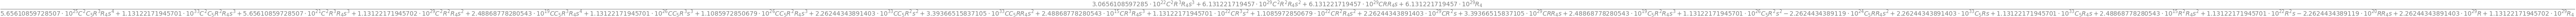

In [12]:
(U_sym[v2]/U_sym[v1]).cancel()

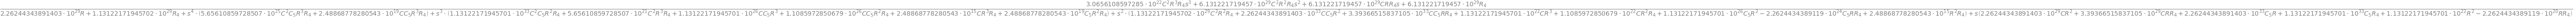

In [13]:
(U_sym[v2]/U_sym[v1]).cancel().collect(s)

The equation above is not very useful, still needs work.

Built a python dictionary of element values

In [14]:
element_value_keys = []
element_value_values = []

for i in range(len(df)):
    if df.iloc[i]['element'][0] == 'F' or df.iloc[i]['element'][0] == 'E' or df.iloc[i]['element'][0] == 'G' or df.iloc[i]['element'][0] == 'H':
        element_value_keys.append(var(df.iloc[i]['element'].lower()))
        element_value_values.append(df.iloc[i]['value'])
        #print('{:s}:{:f},'.format(df.iloc[i]['element'].lower(),df.iloc[i]['value']))
    else:
        element_value_keys.append(var(df.iloc[i]['element']))
        element_value_values.append(df.iloc[i]['value'])
        #print('{:s}:{:.4e},'.format(df.iloc[i]['element'],df.iloc[i]['value']))

element_values = dict(zip(element_value_keys, element_value_values))

In [15]:
element_values

{C₁: 5e-08, C₂: 5e-08, C₃: 1e-07, C₄: 2.2e-07, C₅: 1.8e-07, O₁: nan, R₁: 9530.
0, R₂: 9530.0, R₃: 4750.0, R₄: 73200.0, R₅: 10000.0, R₆: 44200.0, R₇: 10000.0,
 V₁: 1.0}

## Numeric solution
Substitue the element values into the equations and solve for unknown node voltages and currents. Need to set the current source, I1, to zero.

In [16]:
equ_N = equ.subs(element_values)
equ_N

⎡          I_V1 - 5.0e-8⋅s⋅v₃ + v₁⋅(5.0e-8⋅s + 0.000104931794333683) - 0.00010
⎢                                                                             
⎢                                  v₂⋅(1.8e-7⋅s + 0.0001) - 0.0001⋅v₇         
⎢                                                                             
⎢                   -5.0e-8⋅s⋅v₁ - 5.0e-8⋅s⋅v₅ + v₃⋅(1.0e-7⋅s + 0.000210526315
⎢                                                                             
⎢-1.0e-7⋅s⋅v₇ - 0.000104931794333683⋅v₁ + v₄⋅(1.0e-7⋅s + 0.000209863588667366)
⎢                                                                             
⎢             -5.0e-8⋅s⋅v₃ - 0.000104931794333683⋅v₄ + v₅⋅(2.7e-7⋅s + 0.000118
⎢                                                                             
⎢                            0.00012262443438914⋅v₆ - 2.26244343891403e-5⋅v₇  
⎢                                                                             
⎢     I_O1 - 1.0e-7⋅s⋅v₄ - 0.0001⋅v₂ - 2.26244343891

Solve for voltages and currents in terms of Laplace variable s.

In [17]:
U = solve(equ_N,X)

### Find the network function $\frac {v_2(s)}{v_1(s)}$.

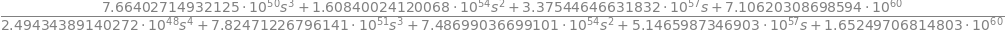

In [18]:
H = (U[v2]/U[v1]).cancel()
H

In [19]:
H_num, H_denom = fraction(H) #returns numerator and denominator

In [20]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [21]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

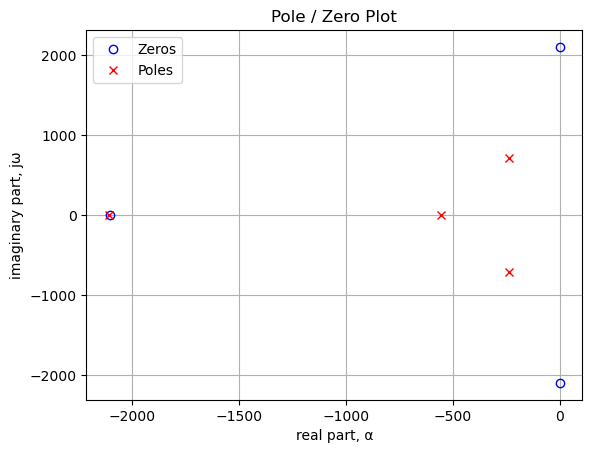

In [22]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [23]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 3
-334.53+0.00j Hz
0.26+334.27j Hz
0.26-334.27j Hz


In [24]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-335.18+0.00j Hz
-37.83+113.63j Hz
-37.83-113.63j Hz
-88.42+0.00j Hz


## AC analysis
Solve equations a frequency of 1.491MHz or $\omega$ equal to 9.3682292e6 radians per second, s = 9.3682292e6j.

In [25]:
freq_Hz = 100 #Hz
w = 2*np.pi*freq_Hz
w

In [26]:
equ_Nw = equ.subs(element_values)
equ_Nw = equ_Nw.subs({s:1j*w})
equ_Nw  # display the equations

⎡          I_V1 + v₁⋅(0.000104931794333683 + 3.14159265358979e-5⋅ⅈ) - 3.141592
⎢                                                                             
⎢                                        v₂⋅(0.0001 + 0.000113097335529233⋅ⅈ) 
⎢                                                                             
⎢            -3.14159265358979e-5⋅ⅈ⋅v₁ + v₃⋅(0.000210526315789474 + 6.28318530
⎢                                                                             
⎢-0.000104931794333683⋅v₁ + v₄⋅(0.000209863588667366 + 6.28318530717959e-5⋅ⅈ) 
⎢                                                                             
⎢            -3.14159265358979e-5⋅ⅈ⋅v₃ - 0.000104931794333683⋅v₄ + v₅⋅(0.00011
⎢                                                                             
⎢                                         0.00012262443438914⋅v₆ - 2.262443438
⎢                                                                             
⎢     I_O1 - 0.0001⋅v₂ - 6.28318530717959e-5⋅ⅈ⋅v₄ - 

In [27]:
U_Nw = solve(equ_Nw,X)

table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_Nw .items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown         mag    phase, deg
---------  --------  ------------
v1         1.000000      0.000000
v2         4.264586   -108.662048
v3         0.271069     40.463593
v4         2.401757     -6.456457
v5         1.187844    -60.144973
v6         1.187844    -60.144973
v7         6.438113    -60.144973
I_V1       0.000150    -20.838911
I_O1       0.000875    166.380500


## AC Sweep
Looking at node 2 voltage.

In [28]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

In [29]:
x = np.logspace(1, 3, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

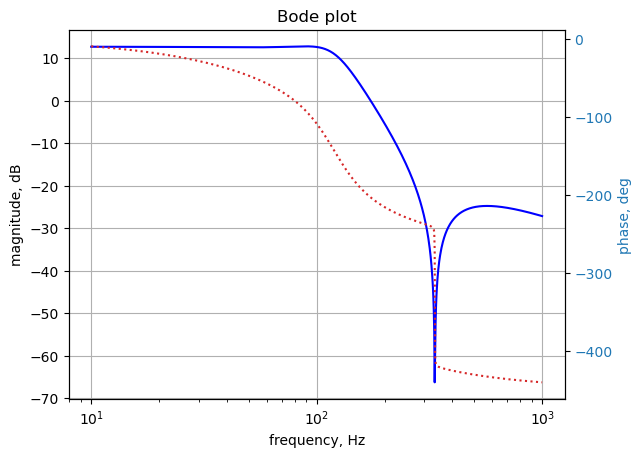

In [30]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Bode plot')
plt.show()

## Summary